In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

Объединяем данные по дате из файла train 

In [ ]:


# Путь к папке с файлами
folder_path = r'C:\Users\user\Desktop\ИНТЕНСИВ3'

# Основной файл (train)
main_file = Path(folder_path) / 'train (3).csv'

# Список дополнительных файлов для объединения
other_files = [
    'Макропоказатели_Чистык.csv',
    'Индекс-LME.csv',
    'Данные-рынка-стройматериалов.csv',
    'Грузоперевозки.csv',
    'Цены-на-сырье.csv',
    'Топливо.csv',
    'Показатели-рынка-металла.csv',
    'test.csv'
]

# Загружаем основной файл
try:
    # Пробуем разные разделители на случай если не запятая
    df_main = pd.read_csv(main_file, parse_dates=[0], dayfirst=True)
except:
    try:
        df_main = pd.read_csv(main_file, sep=';', parse_dates=[0], dayfirst=True)
    except Exception as e:
        print(f"Ошибка при загрузке основного файла: {e}")
        exit()

# Переименовываем первую колонку в 'Date' для удобства
df_main.columns = ['Date'] + list(df_main.columns[1:])

# Обрабатываем дополнительные файлы
for file in other_files:
    file_path = Path(folder_path) / file
    try:
        # Пробуем загрузить файл с разными разделителями
        try:
            df = pd.read_csv(file_path, parse_dates=[0], dayfirst=True)
        except:
            df = pd.read_csv(file_path, sep=';', parse_dates=[0], dayfirst=True)
        
        # Переименовываем первую колонку в 'Date'
        df.columns = ['Date'] + list(df.columns[1:])
        
        # Объединяем с основным DataFrame
        df_main = pd.merge(df_main, df, on='Date', how='left')
        
        print(f"Файл {file} успешно объединен")
    except Exception as e:
        print(f"Ошибка при обработке файла {file}: {e}")

# Сохраняем результат
output_file = Path(folder_path) / 'merged_data.csv'
df_main.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"\nОбъединение завершено. Результат сохранен в {output_file}")
print(f"Всего строк: {len(df_main)}")
print(f"Колонки в итоговом файле: {list(df_main.columns)}")

Ошибка при обработке файла Макропоказатели_Чистык.csv: You are trying to merge on object and datetime64[ns] columns for key 'Date'. If you wish to proceed you should use pd.concat
Файл Индекс-LME.csv успешно объединен
Ошибка при обработке файла Данные-рынка-стройматериалов.csv: You are trying to merge on object and datetime64[ns] columns for key 'Date'. If you wish to proceed you should use pd.concat
Файл Грузоперевозки.csv успешно объединен
Файл Цены-на-сырье.csv успешно объединен
Ошибка при обработке файла Топливо.csv: You are trying to merge on object and datetime64[ns] columns for key 'Date'. If you wish to proceed you should use pd.concat
Ошибка при обработке файла Показатели-рынка-металла.csv: You are trying to merge on object and datetime64[ns] columns for key 'Date'. If you wish to proceed you should use pd.concat
Файл test.csv успешно объединен

Объединение завершено. Результат сохранен в C:\Users\user\Desktop\ИНТЕНСИВ3\merged_data.csv
Всего строк: 400
Колонки в итоговом файле

C:\Users\user\AppData\Local\Temp\ipykernel_9024\2270579032.py:42: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv(file_path, parse_dates=[0], dayfirst=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9024\2270579032.py:42: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv(file_path, parse_dates=[0], dayfirst=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9024\2270579032.py:42: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv(file_path, parse_dates=[0], dayfirst=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9024\2270579032.py:42: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was spec

Проверям пропуски

Анализ пропусков:
                                              Колонка  Количество пропусков  \
0                                                Date                     0   
1                                  Цена на арматуру_x                     0   
2                                                цена                   400   
3                     Индекс стоимости грузоперевозок                   400   
4   Концентрат коксующегося угля_Россия марка ОС F...                     5   
..                                                ...                   ...   
58  ЖРС_Средневзвешенная цена за 1 % Fe в концентр...                   212   
59  ЖРС_Средневзвешенная цена за 1 % Fe в окатыши,...                   212   
60  ЖРС_Украинский концентрат Fe 65-68%,  DAP гран...                   160   
61  ЖРС_Украинские окатыши Fe 65-66%, DAP граница ...                   160   
62                                 Цена на арматуру_y                   400   

    Процент пропусков  
0        

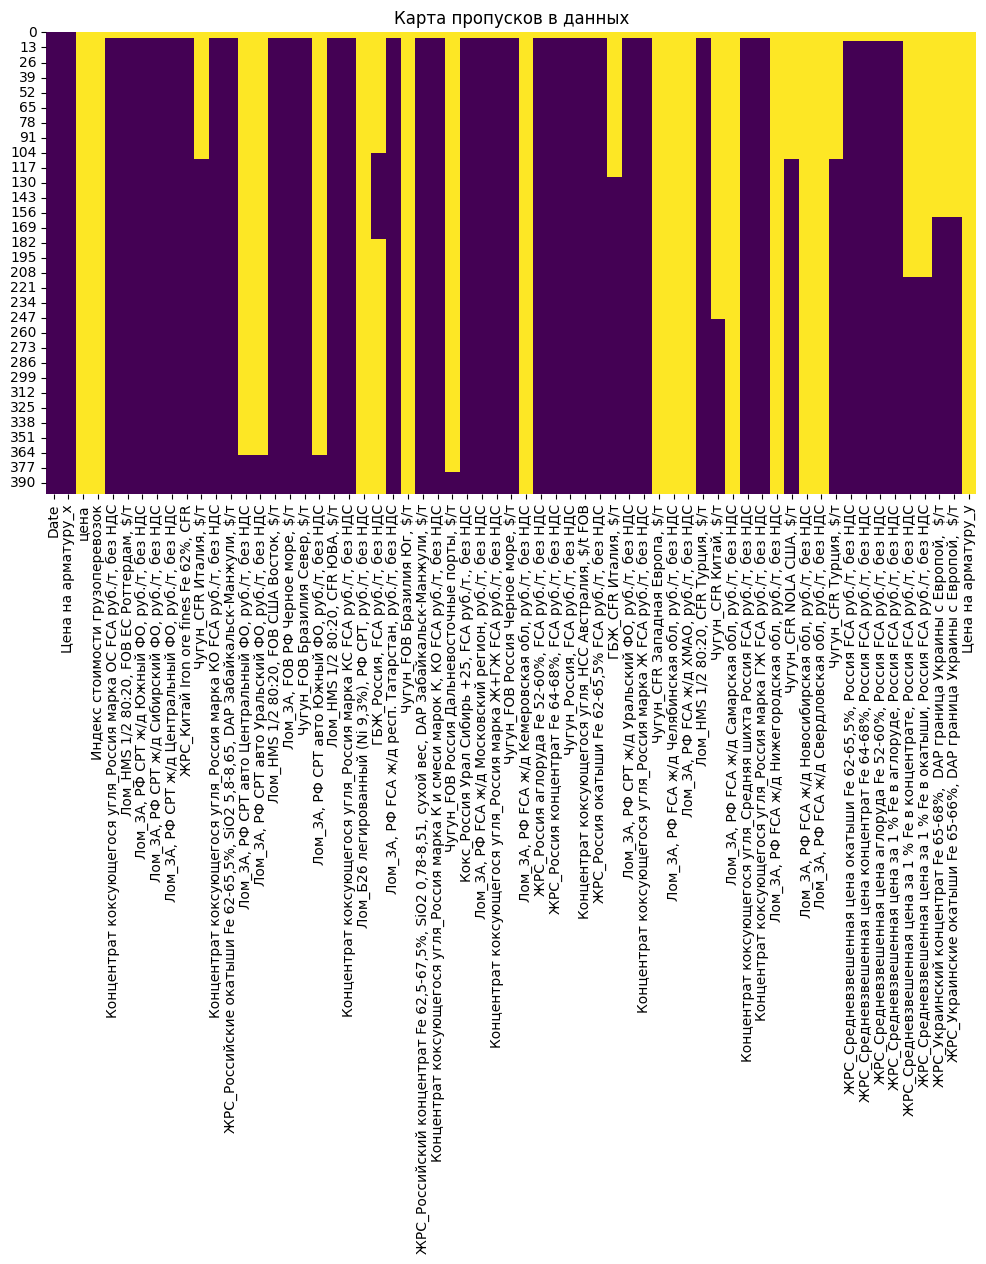

In [ ]:


# Загрузка объединенного файла
merged_df = pd.read_csv(r'C:\Users\user\Desktop\ИНТЕНСИВ3\merged_data.csv')

# 1. Анализ пропусков
print("Анализ пропусков:")
missing_data = merged_df.isnull().sum()  # Количество пропусков в каждой колонке
missing_percentage = (missing_data / len(merged_df)) * 100  # Процент пропусков

# Создаем DataFrame для отображения пропусков
missing_df = pd.DataFrame({
    "Колонка": missing_data.index,
    "Количество пропусков": missing_data.values,
    "Процент пропусков": missing_percentage.values
})
print(missing_df)

# 2. Визуализация пропусков
plt.figure(figsize=(12, 6))
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
plt.title("Карта пропусков в данных")
plt.show()

Работаем с пропусками, удаляем колонки в которых пропусков больше чем 80%, а заполнять будем сначала используем forward fill (заполнение последним известным значением)

Затем backward fill (заполнение следующим известным значением)

Для оставшихся пропусков применяем линейную интерполяцию с учетом времени

In [ ]:

# Загрузка данных
df = pd.read_csv('merged_data.csv', parse_dates=['Date'], index_col='Date')

# 1. Удаление столбцов с более чем 80% пропусков
threshold = len(df) * 0.8  # 80% от количества строк
df_cleaned = df.dropna(axis=1, thresh=threshold)

print(f"Удалено {len(df.columns) - len(df_cleaned.columns)} столбцов")

# 2. Заполнение пропусков с учетом временных рядов
# Сначала forward fill (заполнение последним известным значением)
df_filled = df_cleaned.ffill()

# Затем backward fill (заполнение следующим известным значением)
df_filled = df_filled.bfill()

# Для оставшихся пропусков (если есть) можно использовать линейную интерполяцию по времени
df_filled = df_filled.interpolate(method='time')

# Проверка, остались ли пропуски
if df_filled.isna().sum().sum() > 0:
    print("Внимание: остались незаполненные значения")
    print(df_filled.isna().sum())

# Сохранение результата
df_filled.to_csv('cleaned_and_filled_data.csv')

print("Обработка завершена. Результат сохранен в cleaned_and_filled_data.csv")

Удалено 27 столбцов
Обработка завершена. Результат сохранен в cleaned_and_filled_data.csv


Снова проверяем на пропуски

Анализ пропусков:
                                              Колонка  Количество пропусков  \
0                                                Date                     0   
1                                  Цена на арматуру_x                     0   
2   Концентрат коксующегося угля_Россия марка ОС F...                     0   
3            Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т                     0   
4        Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС                     0   
5    Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС                     0   
6   Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без...                     0   
7                ЖРС_Китай Iron ore fines Fe 62%, CFR                     0   
8   Концентрат коксующегося угля_Россия марка КО F...                     0   
9   ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8...                     0   
10             Лом_HMS 1/2 80:20, FOB США Восток, $/т                     0   
11                    Лом_3А, FOB 

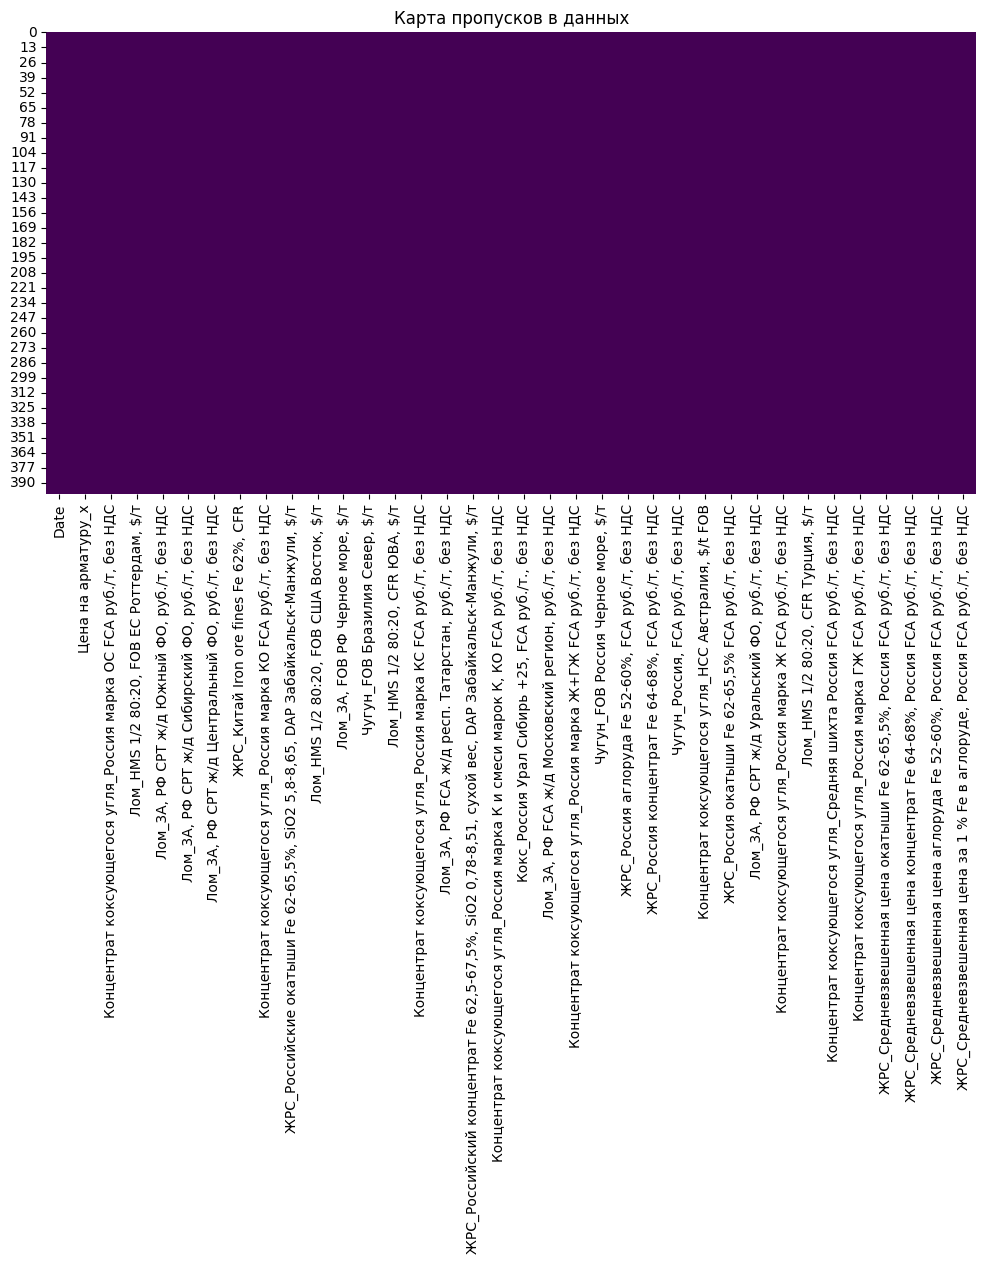

In [ ]:


# Загрузка объединенного файла
merged_df = pd.read_csv(r'C:\Users\user\Desktop\ИНТЕНСИВ3\cleaned_and_filled_data.csv')

# 1. Анализ пропусков
print("Анализ пропусков:")
missing_data = merged_df.isnull().sum()  # Количество пропусков в каждой колонке
missing_percentage = (missing_data / len(merged_df)) * 100  # Процент пропусков

# Создаем DataFrame для отображения пропусков
missing_df = pd.DataFrame({
    "Колонка": missing_data.index,
    "Количество пропусков": missing_data.values,
    "Процент пропусков": missing_percentage.values
})
print(missing_df)

# 2. Визуализация пропусков
plt.figure(figsize=(12, 6))
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
plt.title("Карта пропусков в данных")
plt.show()

Проверяем данные на стационарность

In [13]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Загрузка данных
file_path = 'C:/Users/user/Desktop/ИНТЕНСИВ3/cleaned_and_filled_data.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Функция проверки стационарности с простым выводом
def check_stationarity_simple(series, name):
    # Выполняем тест Дики-Фуллера
    result = adfuller(series.dropna())
    p_value = result[1]
    
    # Определяем стационарность
    is_stationary = p_value <= 0.05
    
    # Формируем понятный вывод
    print(f"\nАнализ: {name}")
    print("-" * 40)
    print(f"p-value: {p_value:.4f}")
    
    if is_stationary:
        print("✅ Ряд СТАЦИОНАРЕН (p-value ≤ 0.05)")
    else:
        print("❌ Ряд НЕ стационарен (p-value > 0.05)")
    
    print("\nКритические значения:")
    for key, value in result[4].items():
        print(f"{key}: {value:.4f}")
    
    # Дополнительная диагностика
    if not is_stationary:
        print("\nСовет: Попробуйте дифференцировать ряд (вычислить разницы между значениями)")
    
    return is_stationary

# Проверяем все числовые столбцы
print("="*50)
print("АНАЛИЗ СТАЦИОНАРНОСТИ ВРЕМЕННЫХ РЯДОВ")
print("="*50)

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[column].count() > 0:  # Проверяем только столбцы с данными
        check_stationarity_simple(df[column], column)

АНАЛИЗ СТАЦИОНАРНОСТИ ВРЕМЕННЫХ РЯДОВ

Анализ: Цена на арматуру_x
----------------------------------------
p-value: 0.3200
❌ Ряд НЕ стационарен (p-value > 0.05)

Критические значения:
1%: -3.4471
5%: -2.8689
10%: -2.5707

Совет: Попробуйте дифференцировать ряд (вычислить разницы между значениями)

Анализ: Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС
----------------------------------------
p-value: 0.0782
❌ Ряд НЕ стационарен (p-value > 0.05)

Критические значения:
1%: -3.4474
5%: -2.8691
10%: -2.5708

Совет: Попробуйте дифференцировать ряд (вычислить разницы между значениями)

Анализ: Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т
----------------------------------------
p-value: 0.5572
❌ Ряд НЕ стационарен (p-value > 0.05)

Критические значения:
1%: -3.4475
5%: -2.8691
10%: -2.5708

Совет: Попробуйте дифференцировать ряд (вычислить разницы между значениями)

Анализ: Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС
----------------------------------------
p-value: 0.7025
❌ Р

Делаем данные стационарными логарифмированием и дифференцированием 

In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

def make_stationary(series, max_diff=3):
    """
    Преобразует ряд в стационарный с помощью:
    1. Логарифмирования (если данные положительные)
    2. Дифференцирования (до max_diff раз)
    Возвращает преобразованный ряд и количество примененных операций
    """
    transformed = series.copy()
    operations = []
    
    # Проверка на положительные значения для логарифма
    if (transformed > 0).all():
        transformed = np.log(transformed)
        operations.append("Логарифмирование")
    
    # Применяем дифференцирование пока ряд не станет стационарным
    for i in range(max_diff + 1):
        # Проверка стационарности
        p_value = adfuller(transformed.dropna())[1]
        if p_value <= 0.05:
            break
            
        if i < max_diff:
            transformed = transformed.diff().dropna()
            operations.append(f"Дифференцирование {i+1} порядка")
    
    return transformed, operations

# Загрузка данных
file_path = 'C:/Users/user/Desktop/ИНТЕНСИВ3/cleaned_and_filled_data.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Создаем новый DataFrame для стационарных данных
stationary_df = pd.DataFrame(index=df.index)

# Применяем преобразования ко всем числовым столбцам
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[column].count() > 0:  # Только для столбцов с данными
        stationary_series, ops = make_stationary(df[column])
        stationary_df[f"{column}_stationary"] = stationary_series
        
        print(f"\nПреобразования для {column}:")
        print("-" * 40)
        if not ops:
            print("Ряд уже стационарен, преобразования не потребовались")
        else:
            print("Примененные операции:", " → ".join(ops))
        
        # Проверяем результат
        p_value = adfuller(stationary_series.dropna())[1]
        print(f"Результат: p-value = {p_value:.4f}", 
              "(стационарен)" if p_value <= 0.05 else "(не стационарен)")

# Сохраняем результат
output_path = 'C:/Users/user/Desktop/ИНТЕНСИВ3/stationary_data.csv'
stationary_df.to_csv(output_path)
print(f"\nСтационарные данные сохранены в: {output_path}")


Преобразования для Цена на арматуру_x:
----------------------------------------
Примененные операции: Логарифмирование → Дифференцирование 1 порядка
Результат: p-value = 0.0000 (стационарен)

Преобразования для Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС:
----------------------------------------
Примененные операции: Логарифмирование → Дифференцирование 1 порядка
Результат: p-value = 0.0000 (стационарен)

Преобразования для Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т:
----------------------------------------
Примененные операции: Логарифмирование → Дифференцирование 1 порядка
Результат: p-value = 0.0000 (стационарен)

Преобразования для Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС:
----------------------------------------
Примененные операции: Логарифмирование → Дифференцирование 1 порядка
Результат: p-value = 0.0000 (стационарен)

Преобразования для Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС:
----------------------------------------
Примененные операции: Логар

Графики для удостоверения, что данные стационарны

Найдены столбцы с ценами на арматуру: ['Цена на арматуру_x_stationary']


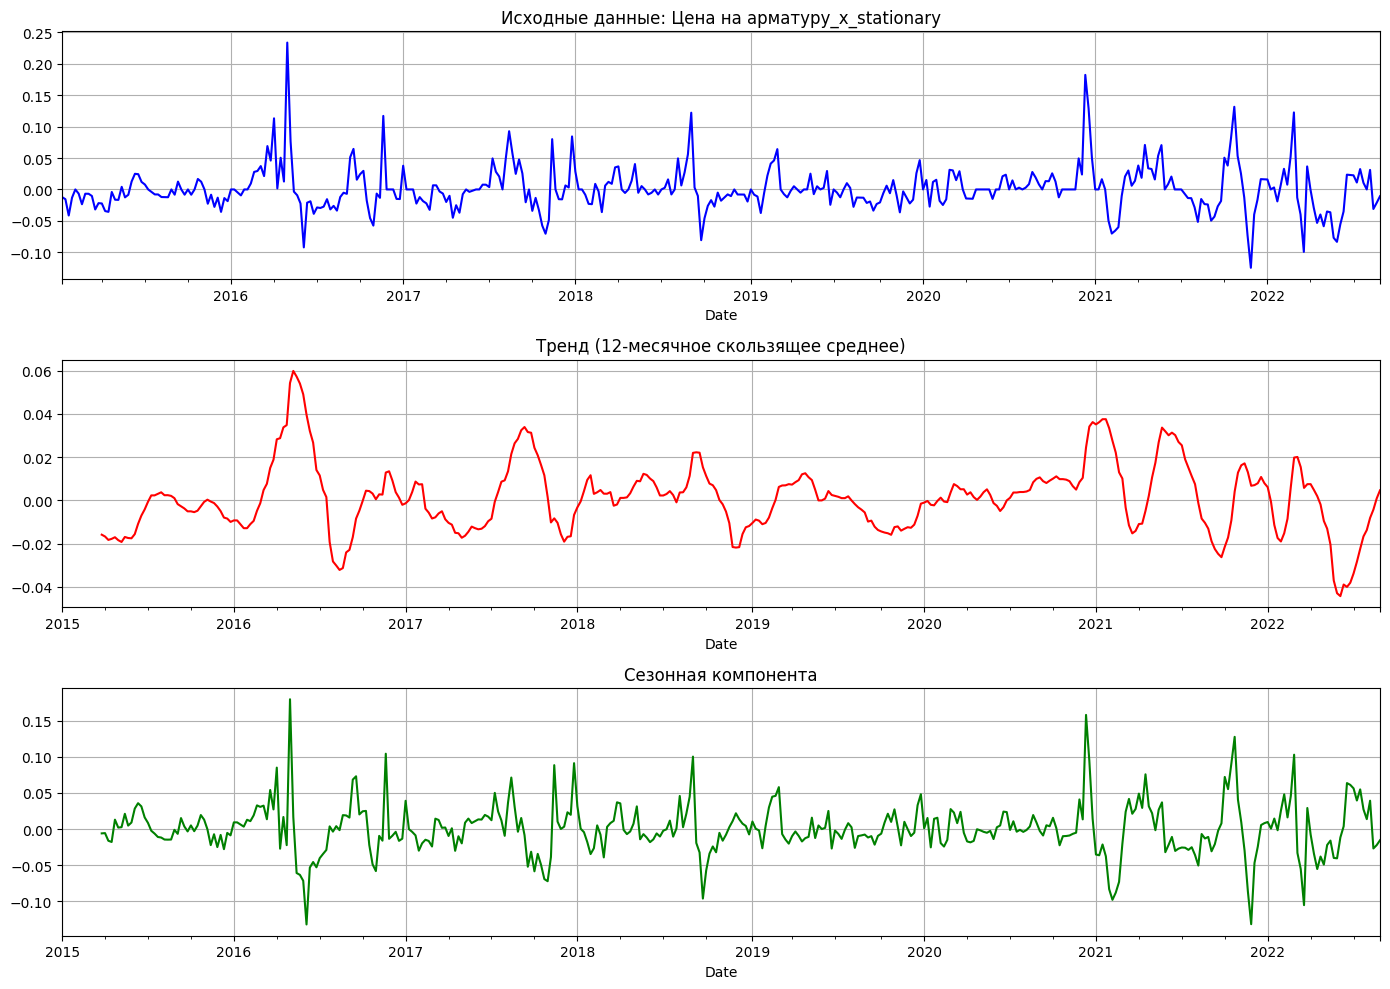

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv(r'C:\Users\user\Desktop\ИНТЕНСИВ3\stationary_data.csv', parse_dates=['Date'], index_col='Date')

# Выбираем столбцы с ценами на арматуру (по ключевым словам)
armatura_cols = [col for col in df.columns if 'арматур' in col.lower()]

if not armatura_cols:
    print("Не найдены столбцы с ценами на арматуру")
else:
    print(f"Найдены столбцы с ценами на арматуру: {armatura_cols}")
    
    for col in armatura_cols:
        # Создаем графики
        plt.figure(figsize=(14, 10))
        
        # 1. Исходный ряд
        plt.subplot(3, 1, 1)
        df[col].dropna().plot(color='blue')
        plt.title(f'Исходные данные: {col}')
        plt.grid(True)
        
        # 2. Тренд (скользящее среднее за 12 месяцев)
        plt.subplot(3, 1, 2)
        df[col].rolling(window=12).mean().plot(color='red')
        plt.title('Тренд (12-месячное скользящее среднее)')
        plt.grid(True)
        
        # 3. Сезонность (разница между исходным рядом и трендом)
        plt.subplot(3, 1, 3)
        (df[col] - df[col].rolling(window=12).mean()).plot(color='green')
        plt.title('Сезонная компонента')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()
        
        # Дополнительный анализ сезонности по месяцам
        if df.index.inferred_freq == 'M':  # Если данные месячные
            monthly_data = df[col].dropna()
            monthly_avg = monthly_data.groupby(monthly_data.index.month).mean()
            
            plt.figure(figsize=(10, 4))
            monthly_avg.plot(kind='bar', color='purple')
            plt.title('Средние значения по месяцам')
            plt.xlabel('Месяц')
            plt.ylabel('Цена')
            plt.grid(True)
            plt.show()

Выводим корреляционную таблицу и смторим зависимости

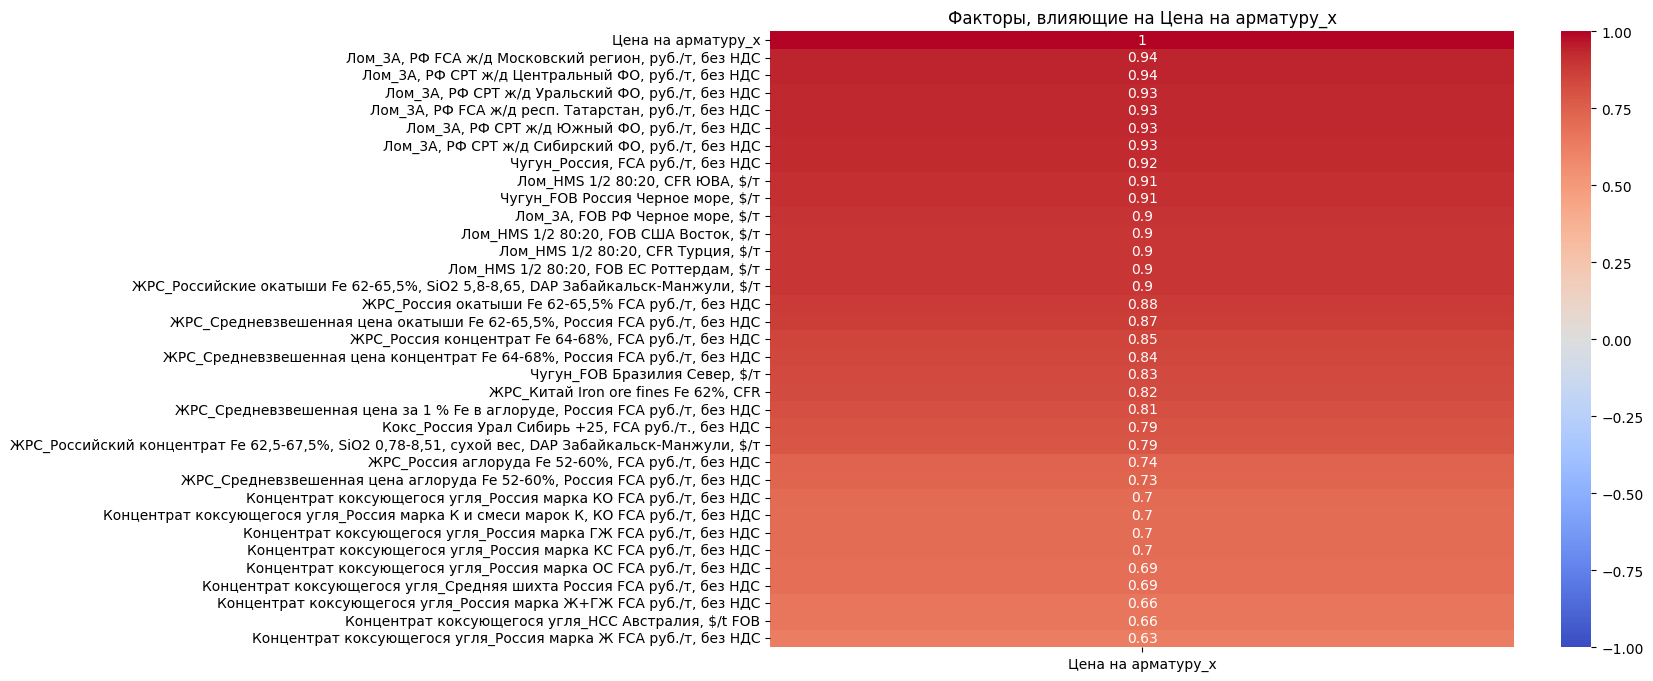

Топ влияющих факторов:
Цена на арматуру_x                                                                                  1.000000
Лом_3А, РФ FCA ж/д Московский регион, руб./т, без НДС                                               0.938018
Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС                                                  0.937728
Лом_3А, РФ CPT ж/д Уральский ФО, руб./т, без НДС                                                    0.934200
Лом_3А, РФ FCA ж/д респ. Татарстан, руб./т, без НДС                                                 0.932649
Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС                                                        0.930220
Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС                                                    0.925107
Чугун_Россия, FCA руб./т, без НДС                                                                   0.923741
Лом_HMS 1/2 80:20, CFR ЮВА, $/т                                                                     0.911

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv(r'C:\Users\user\Desktop\ИНТЕНСИВ3\cleaned_and_filled_data.csv')

# Выделение числовых колонок (исключаем дату)
numeric_cols = df.select_dtypes(include=['number']).columns

# Расчет корреляционной матрицы
correlation_matrix = df[numeric_cols].corr(method='pearson')  # Можно использовать 'spearman' для нелинейных связей

# Выбор корреляций с ценой арматуры (предполагая, что это второй столбец)
target_column = df.columns[1]
price_correlations = correlation_matrix[target_column].sort_values(ascending=False)

# Визуализация
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[[target_column]].sort_values(by=target_column, ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Факторы, влияющие на {target_column}')
plt.show()

# Вывод таблицы корреляций
print("Топ влияющих факторов:")
print(price_correlations.to_string())